## Inverse transform sampling

Let $X$ have cumulative distribution function $F_X$ (i.e. $F_X(x)=P(X\leq x)$). We know that $Y = F_X(X)$ then has $U([0,1])$ distribution, so that the random variable $F_X^{-1}(Y)$ has the same distribution as $X$.

The inverse transform algorithm is:

1. Sample a value from $U([0,1]))$.

2. Compute $X = F^{-1}(U)$.


### The Exponential distribution


Let $X\sim\text{Exp}(\lambda)$, i.e. $X \in \mathbb{R}_{\geq 0}$ is an exponentially distributed variable with parameter $\lambda > 0$. The cumulative distribution function of $X$ is given by:

$$
F(x) = P(X\leq x \mid \lambda) = 1 - \exp(-\lambda x) 
$$

Write down the inverse $F^{-1}(u)$ for $u\in(0,1)$ of the function $F(x)$.

Set $u = 1-\exp(-\lambda x)$ for $x\geq 0$. Then $x = \lambda^{-1} \ln(1- u)$. So $F^{-1}(u) = \lambda^{-1} \ln(1- u)$ for $u\in(0,1)$.

Write a function `expSamp1(lam)` that generates a single sample from $\text{Exp}(\lambda)$ for any $\lambda > 0$ and run it once with $\lambda = 2$.

In [1]:
expSamp1 = function(lam){
    
    u = runif(1)
    return(-(1/lam)*log(u))
    
}
  
expSamp1(2)

[1] 1.531242

Using `expSamp1(lam)` or otherwise, write a function `expSamp(n, lam)` that generates a sample of size $n$ from $\text{Exp}(\lambda)$. You may find it useful to read [this](https://www.guru99.com/r-apply-sapply-tapply.html), for example. 

   [1] 2.1881429583 0.1912599550 0.3160972421 0.0095687863 0.3480732029
   [6] 0.9754875360 0.3226419706 2.0022856313 0.0021214825 0.7862724006
  [11] 0.0441721005 1.0858401384 0.1264774235 0.1982040255 0.8775112088
  [16] 0.4815868928 0.2650733553 0.7784188566 1.6014332407 0.1025635421
  [21] 0.1316289245 0.2811258214 1.8757511501 0.3929634392 0.2195307863
  [26] 0.5375859674 0.4603987700 0.8968232123 0.0600639486 0.5422460047
  [31] 0.2706404292 0.0925784078 0.7298335101 0.0891548931 1.6139531765
  [36] 0.4491161859 0.4187480224 0.0909648584 0.1663324140 0.2172908047
  [41] 0.6694923665 0.2455446229 0.4849113750 0.1412132425 1.8109954883
  [46] 0.1223622800 1.0069071263 0.1831785169 1.0320323009 0.3972882577
  [51] 0.8005139222 0.7143459034 0.0803672159 0.3338118108 0.4732109796
  [56] 0.3052152098 0.3562656890 0.9255410888 0.2668048815 0.5096789238
  [61] 0.2574652945 0.3121568964 0.0095262743 1.0845673550 0.2762567113
  [66] 0.5951245918 0.1425507989 0.3635974736 0.0806308472 0.065

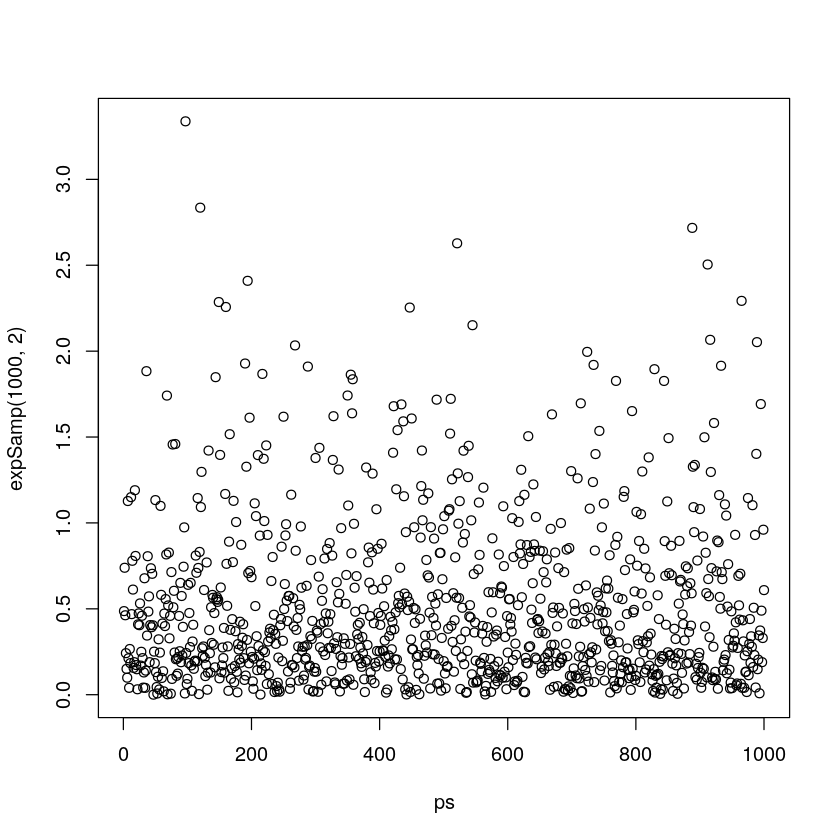

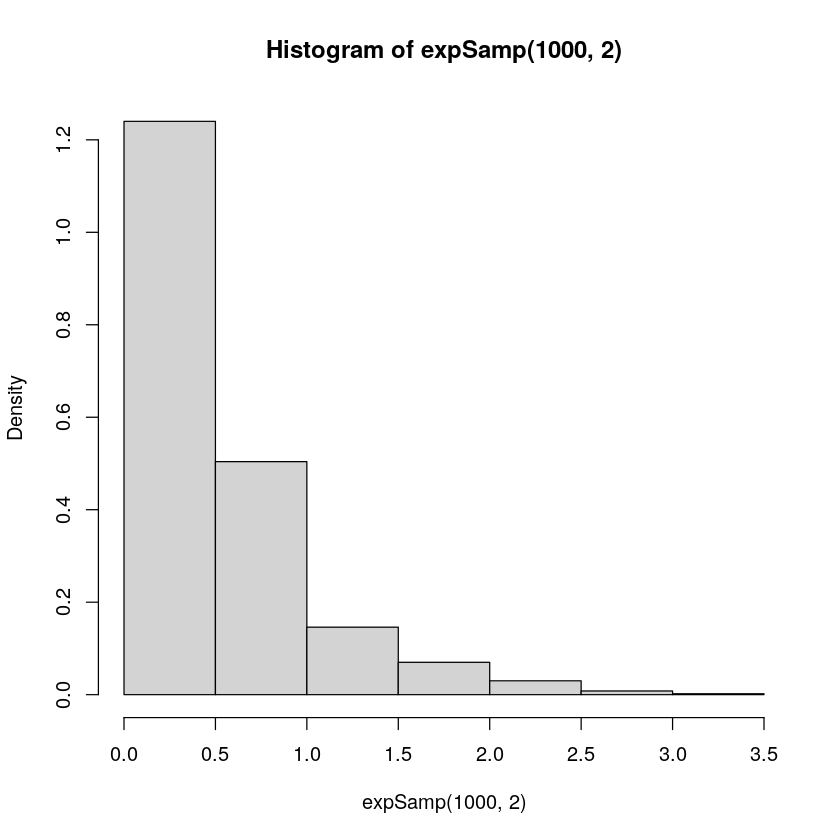

In [2]:
expSamp = function(n, la){
    
    sample = sapply(1:n, function(i){expSamp1(lam = la)})
    
    return(sample)
    
}
ps = seq(from = 1, to = 1000, by = 1)
print(expSamp(1000, 2))
plot(ps,expSamp(1000, 2))
hist(expSamp(1000, 2), freq=FALSE)

Note that R has functions `mean`, `var`, and `sd` that compute means, variances, and standard deviations. Read the help on these functions to find out precisely how they work.

Draw a sample of size 1000 from the Exponential distribution with parameter $\lambda = 2$, and plot its histogram and empirical cumulative distribution function (this is the function $E$ with value at $x$ equal to the proportion of data points with values $\leq x$). The histogram should look like the probability density function. Experiment with different bin numbers (argument `breaks = 20`). For the empirical cdf, either write your own function, or check out `ecdf`. (You can use `par` to arrange plots side-by-side if you wish.)

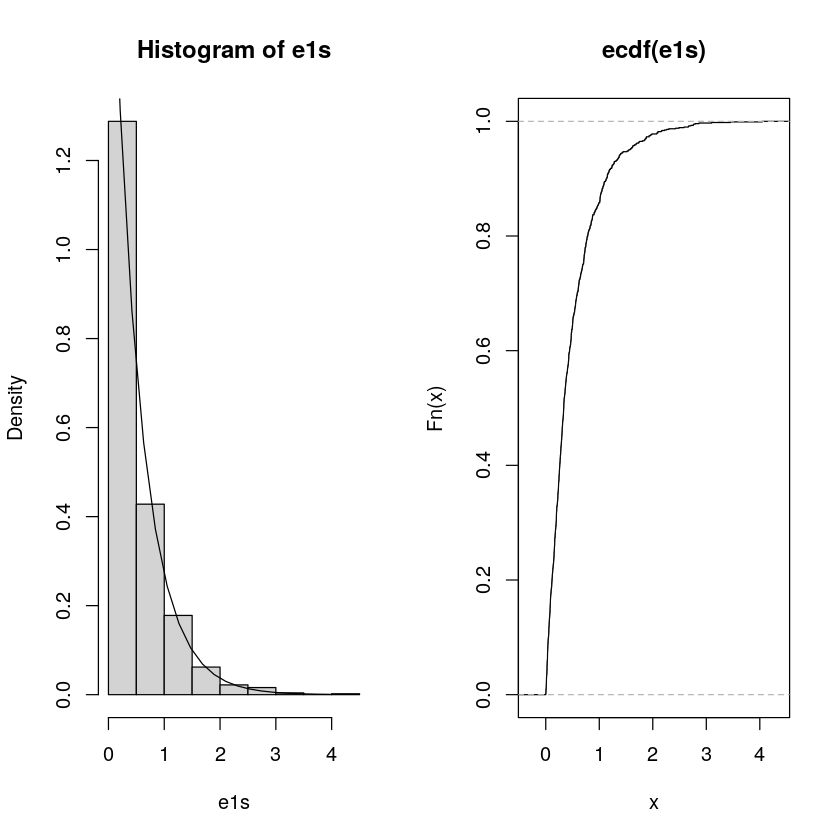

In [3]:
e1s = expSamp(1000,2)

# Create two panels for plots
par(mfrow = c(1, 2))

# Plot the histogram in the left-hand panel. 
hist(e1s, freq=FALSE)
x<-seq(0,4,length=20)
lines(x, 2*exp(-2*x))

# Plot the empirical cdf in the right-hand panel.
F = ecdf(e1s)
plot(F)


Calculate the mean and the variance of this sample. What are the mean and variance of the Exp distribution? Are the sample mean and variance close to what you would expect?

In [4]:
print(paste("Mean: ", mean(e1s))) #1/lambda
print(1/2)
print(1/(2^2))
print(paste("Variance: ", var(e1s))) #1/lambda^2

[1] "Mean:  0.502602775133715"
[1] 0.5
[1] 0.25
[1] "Variance:  0.267334848209563"


## Sampling from discrete distributions

Suppose that $X$ can take on only a finite set of values $x_1<x_2<\dots<x_m$ in $\mathbb{R}$, and let it have cumulative distribution function $F(x) = P(X\leq x)$. We can reformulate the inverse transform method algorithm as follows:

1. Sample a random value $u$ from $U([0,1])$.

2. Find the smallest positive integer $i$ such that $F(x_i)\geq u$, and return $x_i$ as the value of $X$.

Write a function `tstSamp()` that generates a single value from $\text{Bin}(2, 1/3)$ using this method, then generate 1000 samples and plot their histogram. Be careful with the latter: set `freq = FALSE` to get probabilities, but you will also need to play with `breaks` to get a meangful result. 

Note that for many common distributions (e.g. the Normal / Gaussian distribution), R provides a probability (density) functions (e.g. `dnorm`), a random sampling function (e.g. `rnorm`), a cumulative distribution function (e.g. `pnorm`), and a quantile function, i.e. inverse cdf (e.g. `qnorm`). For this exercise, do not use `rbinom`, but feel free to use `dbinom` and `runif`, the sampling function for $U([0, 1])$.

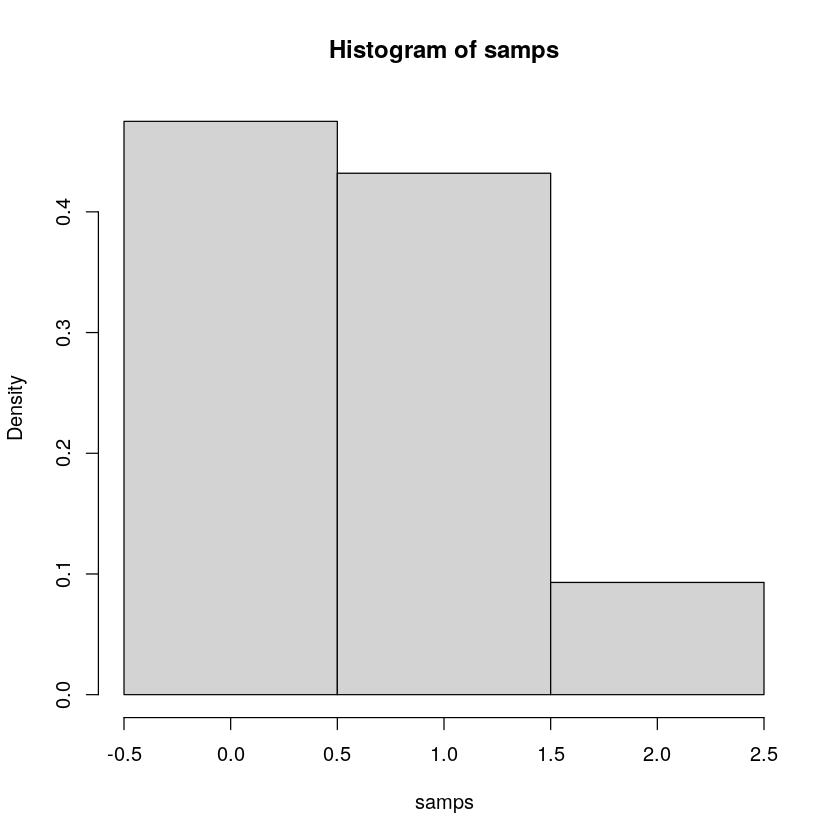

In [5]:

tstSamp = function(){
    
    u = runif(1)
    rs = 0:2
    probs = dbinom(rs, 2, 1/3) 
    F = cumsum(probs)

    i = which(u <= F)[[1]]

    return(i - 1)
        
}

samps = sapply(1:1000, function(i){tstSamp()})

hist(samps, freq=FALSE, breaks = c(-0.5, 0.5, 1.5, 2.5))

## Rejection Sampling

The acceptance-rejection method is used to simulate from probability distributions for which it is hard or computationally expensive to invert the cumulative distribution function. The algorithm assumes that we can sample from another probability distribution that provides an envelope for the target density function.

Suppose that:

- we wish to sample values from a probability distribution with density function $f$;
- we already can sample values from a probability distribution with density function $h$;
- we know a value $k$ such that $k h(x)\geq f(x)$ for all $x$.

Let $a(x) = f(x)/[ k h(x)]$. The rejection sampling algorithm is:

1. Sample a value $z$ from the distribution with density $h$.

2. Sample a value $u$ from $U(0,1)$

3. If $u\leq a(z)$, then return $x = z$, else go to 1.

Note that sampling from $U([0, 1])$ and then testing against $a(\tilde x)$ is equivalent to sampling from $U([0,  k h(z)])$ and then testing against $f(z)$. 

### The $\text{Beta}(2,2)$ distribution

The Beta distribution with both shape parameters equal to $2$ has probability density function, for $x\in [0, 1]$:

$$
f(x)= 6x(1-x)
$$

Suppose that we want to simulate from $\text{Beta}(2,2)$. Write a function `beta22SampAR1()` which generates a single value using the rejection method, taking $h$ to be uniform on $[0, 1]$. Pick a suitable value of $k$. Which value maximizes the probability of acceptance?

In [6]:
beta22SampAR1 = function(){
    
    k = 1.5
    
    z = runif(1)
    u = runif(1)
    
    a = (6 * z * (1 - z)) / k
    # OR
    a = dbeta(z, 2, 2) / k

    
    if (u <= a){
        
        return(z)
    }    
    else{
        beta22SampAR1()
    }
          
}

beta22SampAR1()  

[1] 0.8588778

Write a function `beta22SampAR(n)` which generates a sample of size $n$ using this method.

In [7]:
beta22SampAR = function(n){
    
    sample = sapply(1:n, function(i){beta22SampAR1()})
    
    return(sample)
    
}

Now draw a sample of size 1000 from $\text{Beta}(2,2)$ using `beta22sampAR` and plot its histogram, together with its density function superimposed (use `lines` to plot on an existing plot). Check that it looks correct.

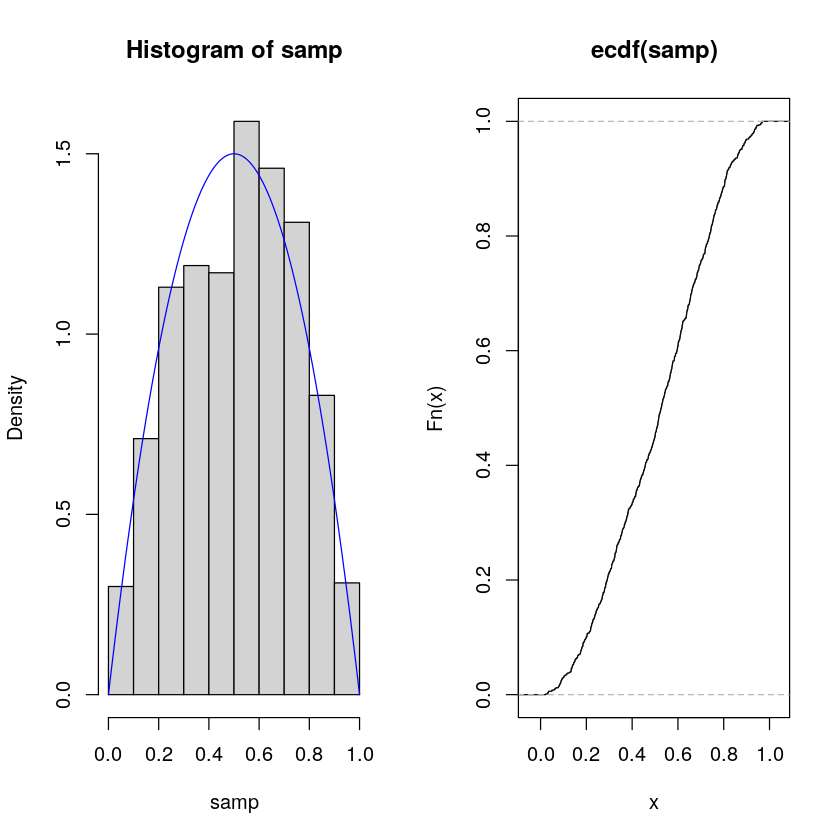

In [8]:
n = 1000

samp = beta22SampAR(n)

par(mfrow = c(1, 2))

# Plot the histogram in the left-hand panel
hist(samp, freq = FALSE)

# Superimpose the density
xs = seq(0, 1, len = 10000)
ps = dbeta(xs, 2, 2)
lines(xs, ps, col = 'blue')

# Plot the empirical cdf in the right-hand panel
F = ecdf(samp)
plot(F)           

## More Inverse Transform Method

### The Laplace Double Exponential Distribution

Suppose that $X$ has the standard Laplace double exponential distribution on $\mathbb{R}$, with probability density and cumulative distribution functions given by:
\begin{align*}
f(x) & = \frac{1}{2} \exp(-|x|) \\
F(x) & = 
\begin{cases}
\frac{1}{2}\exp(x) & \text{for $x < 0$} \\ 
1 - \frac{1}{2}\exp(-x) & \text{for $x \geq 0$}
\end{cases}
\end{align*}

Write down the inverse of the function $F(x)$.

$$
F^{-1}(u) = 
\begin{cases}
\ln(2u) & \text{for $u < 1/2$} \\ 
-\ln(2-2u) & \text{for $u\geq 1/2$}
\end{cases}
$$

Write a function `laplaceSamp` that generates a sample of size $n$ from the standard Laplace double exponential distribution.

In [9]:
laplaceSamp1 = function(){
    
    u = runif(1)
    
    if (u<= 0.5){
        
        return(log(2*u))
    }
  else{
      
      return(-log(2 - 2*u))
  }
    
    
}

laplaceSamp = function(n){
    
    sample = sapply(1:n, function(i){laplaceSamp1()})
    
    return(sample)
    
}

laplaceSamp(10)
  

[1]  0.9545500  0.3705314 -2.7227145 -7.2937094  0.0708897 -0.1880396
 [7]  2.5077629  1.6510583 -0.6076350  0.4653578

Draw a sample of size 5000 from the standard Laplace double exponential distribution and plot its histogram and superimpose its density (you will need to write a function to compute the density). Does the histogram look correct? Increase the number of cells to $50$. 

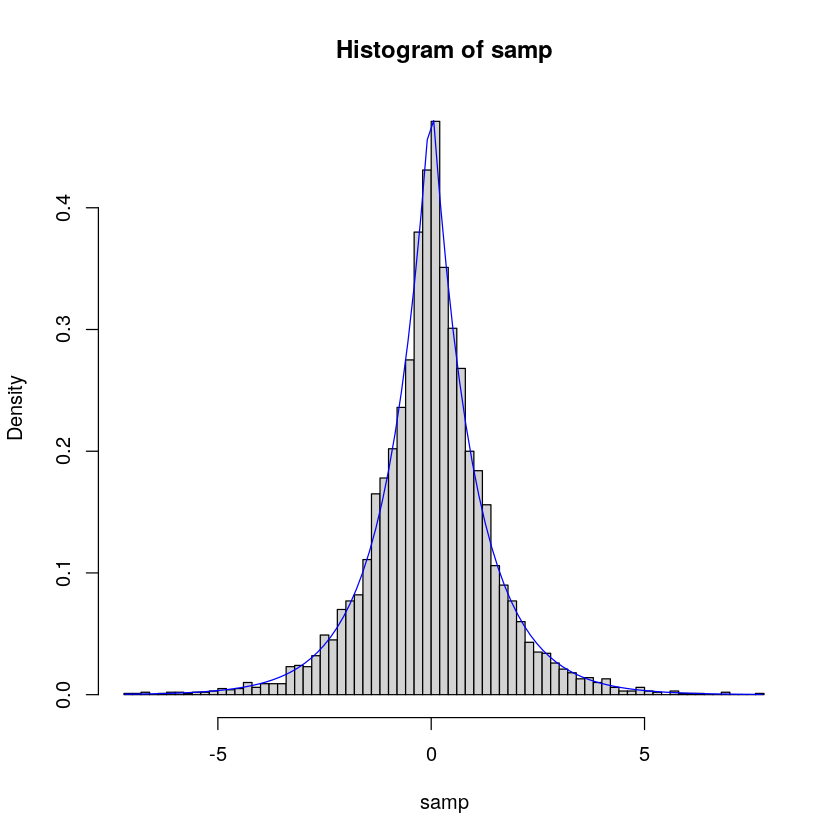

In [10]:
dlaplace = function(x){
    
    p = exp(-abs(x))/2
    
    return(p)
}

n = 5000

samp = laplaceSamp(n)

# Plot histogram
hist(samp, freq = FALSE, breaks = 100)

# Calculate limits of data
l = min(samp)
u = max(samp)

# Compute density values for a bunch of x values and plot
xs = seq(l, u, len = 100)
ps = dlaplace(xs)
lines(xs, ps, col = 'blue')

Calculate the mean and the variance of this sample. What are the mean and variance of the double Laplace distribution? Are the sample mean and variance close to what you would expect?

In [11]:
print(paste("Mean :", mean(samp), "; true value =", 0))
print(paste("Variance: ", var(samp), "; true value =", 2)) #Check this

[1] "Mean : -0.00454574400702525 ; true value = 0"
[1] "Variance:  1.96393471736077 ; true value = 2"


### The $\text{Beta}(2,2)$ distribution

The cumulative distribution function (defined on $[0, 1]$) of $\text{Beta}(2,2)$ is:

$$
F(x) = (3-2x)x^2 
$$

The inverse of $F$, $F^{-1}$, for $p$ in the interval $[0,1]$, is given by (tricky):

$$
F^{-1}(p) = 
\frac{1}{2} 
+ 
\cos\bigl(\arccos[1-2p]/3-2\pi/3\bigr)
$$

Write a function `beta22Samp` that generates a sample of size $n$ from $\text{Beta}(2,2)$.

In [12]:
beta22Samp1 = function(){
    
    u = runif(1)
    
    x = 0.5 + cos(acos(1 - 2 * u)/3 - 2*pi/3)
    
    return(x)
}

beta22Samp = function(n){
    
    sample = sapply(1:n, function(i){beta22Samp1()})
    
    return(sample)
    
}

Draw a sample of size 1000 from $\text{Beta}(2, 2)$ and plot its histogram and superimpose its density. Calculate the mean and the variance of this sample. What are the mean and variance of the $\text{Beta}(2, 2)$ distribution? Are the sample mean and variance close to what you would expect?

[1] "Mean : 0.50575662356616 ; true value = 0.5"
[1] "Variance:  0.0483027019667323 ; true value = 0.05"


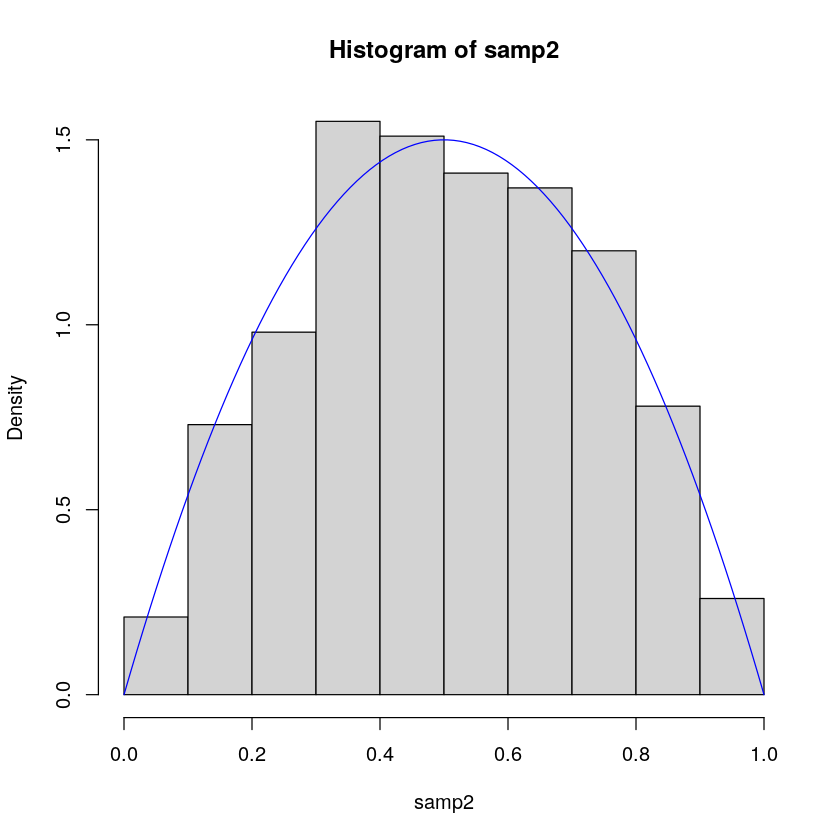

In [13]:
n = 1000

samp2 = beta22Samp(n)

# Plot the histogram
hist(samp2, freq = FALSE)

# Superimpose the density
xs = seq(0, 1, len = 100)
ps = dbeta(xs, 2, 2)
lines(xs, ps, col = 'blue')

print(paste("Mean :", mean(samp2), "; true value =", 0.5))
print(paste("Variance: ", var(samp2), "; true value =", 0.05))

## More rejection method

In this exercise, you will sample from the 'standard' Normal distribution, with mean $0$ and variance $1$, written $\text{N}(0,1)$, using the standard Laplace double exponential as the envelope distribution for $z$. 

Write a function `normalSamp1()` which samples one value from $\text{N}(0,1)$ using the rejection method with the standard Laplace double exponential as the proposal distribution. Note that you can use your previously written function to sample from the Laplace distribution. 

In [25]:
normalSamp1 = function(){

    z = laplaceSamp1()
    u = runif(1)
    
    k = dnorm(1)/dlaplace(1)
 
    ptilde = dnorm(z, 0, 1) / (k * dlaplace(z))

    if (u <= ptilde){
        
        return(z)
    }    
    else{
        
        normalSamp1()
        
    }
          
}

 
  **Question:** Write a function **normalSamp(n)** which samples $n$ values.

In [26]:
normalSamp = function(n){

    sample = sapply(1:n, function(i){normalSamp1()})
    
    return(sample)
    
}


  
  **Question:** Take a sample of 1000 values and check that the histogram looks correct.

[1] "Mean : 0.0588830357101112 ; true value = 0"
[1] "Variance:  1.03539935726232 ; true value = 1"


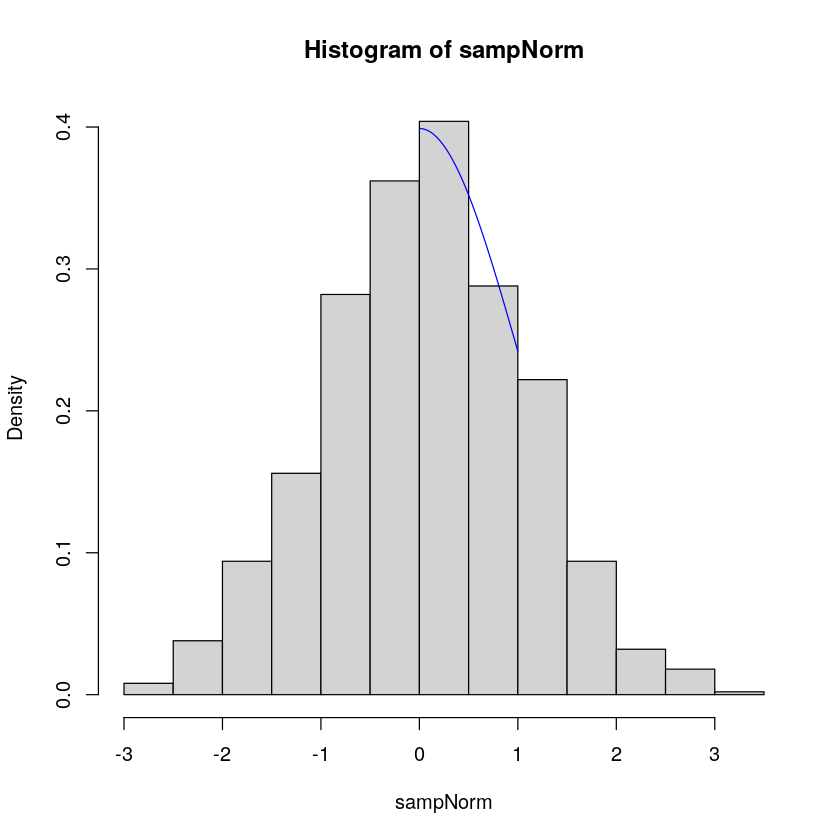

In [28]:
n = 1000

sampNorm = normalSamp(n)

# Plot the histogram
hist(sampNorm, freq = FALSE)

# Calculate limits of data
l = min(samp)
u = max(samp)

# Superimpose the density
xs = seq(l, u, len = 1000)
ps = dnorm(xs, 0, 1)
lines(xs, ps, col = 'blue')

print(paste("Mean :", mean(sampNorm), "; true value =", 0))
print(paste("Variance: ", var(sampNorm), "; true value =", 1))

## More sampling from discrete distributions

Write function `discSamp(n, x, p)` that samples $n$ values from the discrete distribution with possible values in the vector `x` and  probabilities in the vector `p`. Sample 1000 values from a fair die, and plot their histogram. 

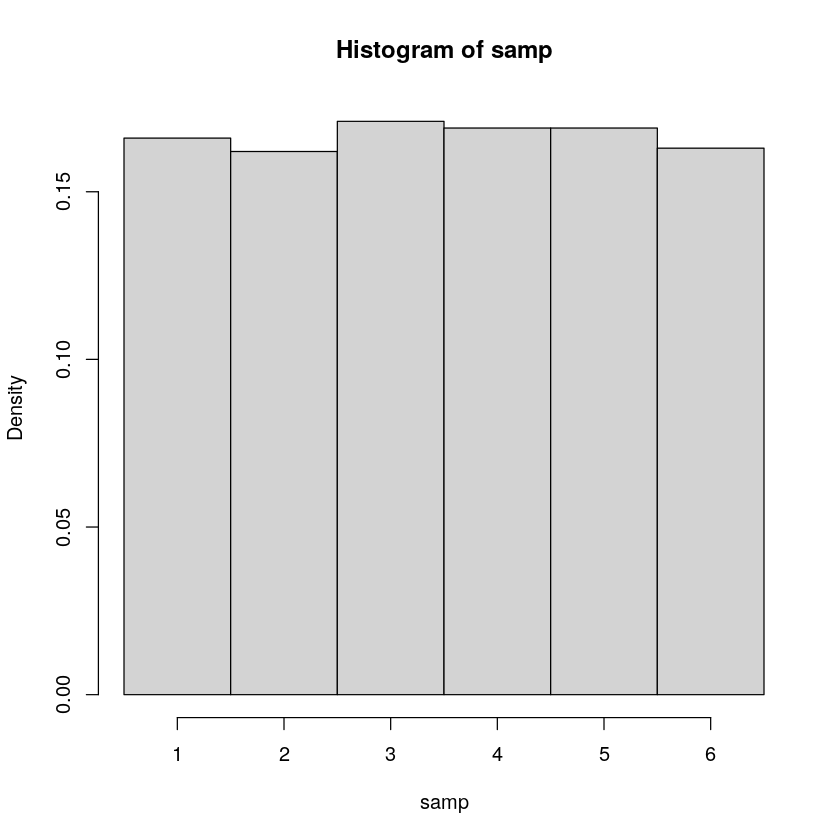

In [17]:
discSamp1 = function(x,p){
    
    u = runif(1)
    
    F = cumsum(p)
    
    i = which(u <= F)[[1]]

    return(x[i])
    
    
}

discSamp = function(n, x, p){
    
    samp = sapply(1:n, function(i){discSamp1(x, p)})
    
    return(samp)
}

xs = 1:6
ps = rep(1/6, times = 6)
n = 1000

samp = discSamp(1000, xs, ps)

hist(samp, freq = FALSE, breaks = c(0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5))

Write a function `poissonSamp(n, lam)` that generates a sample of size $n$ from the Poisson distribution with parameter $\lambda>0$. Note that the Poisson distribution is defined on all of $\mathbb{N}$, so you cannot evaluate the cumulative probailities in advance. Sample 1000 values and plot the histogram (be careful with the `breaks`). 

[1] "Mean : 2.0077 ; true value = 2"
[1] "Variance:  1.96163687368737 ; true value = 2"


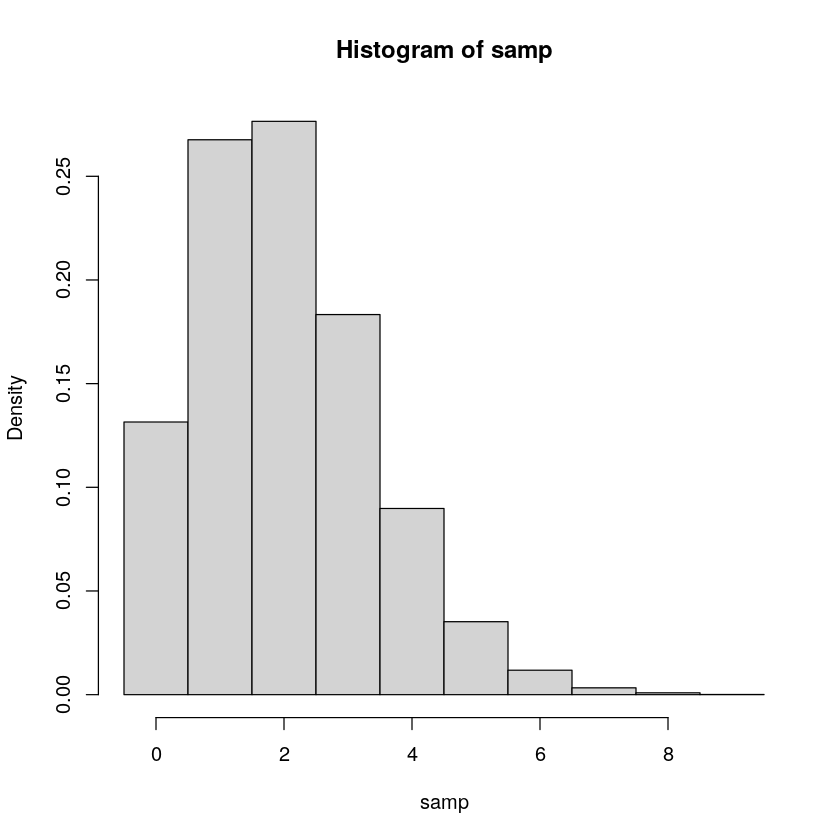

In [18]:
poissonSamp1 = function(lam){
    
    u = runif(1)
    
    i = 0
    Q = dpois(i, lam)
    cont = TRUE
    
    while (cont){
        
        if (u <= Q){
            
            cont = FALSE
            
        }
        else{
            
            i = i + 1
            Q = Q + dpois(i, lam)
        }
    }
    
    return(i)
}

poissonSamp = function(n,lam){

    samp = sapply(1:n, function(i){poissonSamp1(lam)})
    
    return(samp)
}


n = 10000
samp = poissonSamp(n, 2)

l = min(samp)
u = max(samp)
s = c(l - 0.5, (l:u) + 0.5)

hist(samp, freq = FALSE, breaks = s)

print(paste("Mean :", mean(samp), "; true value =", 2))
print(paste("Variance: ", var(samp), "; true value =", 2))

## Approximating the value of $\pi$

Approximate the value of $\pi$ by sampling from the uniform distribution on the unit square, and counting the proportion of points that fall inside the unit circle. Plot the points, colouring them according to whether they are in the unit circle or not, and superimpose a quarter of the unit circle on the plot. 

[1] 3.136

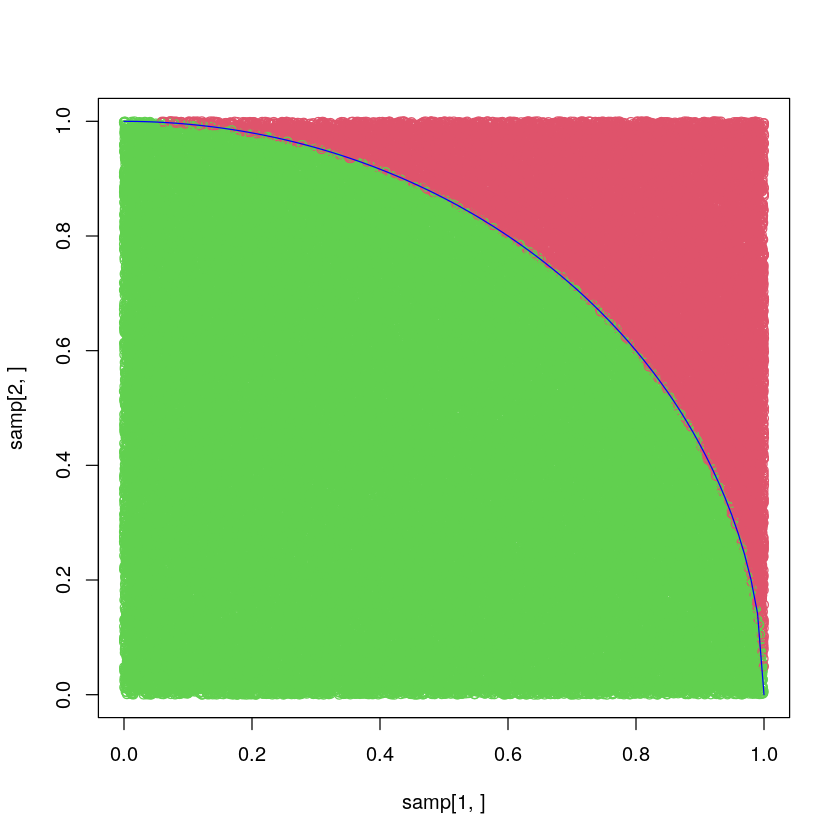

In [112]:
squareSamp1 = function(){
    
    u = runif(2)
    
    return(u)
    
}

squareSamp = function(n){

    samp = sapply(1:n, function(i){squareSamp1()})
    
    return(samp)

}

computePi = function(sample){
    
    radii = sqrt(colSums(sample * sample))

    
    
    numPoints = length(radii)

    numInCircle = sum(radii <= 1)
    
    pihat = 4 * numInCircle / numPoints
    
    return(pihat)
    
}

samp = squareSamp(100000)

pihat = computePi(samp)

pihat

radii = sqrt(colSums(samp * samp))

plot(samp[1,], samp[2,], col = ((radii <= 1) + 2))

xs = seq(0, 1, len = 100)
ys = sqrt(1 - xs * xs)

lines(xs, ys, col = 'blue')

Derive an expression for the variance of the estimator $\hat{\pi}$ of $\pi$ as a function of $n$, the number of points sampled. Write some code to evaluate the typical errors for $n \in \{10^{a}\}_{a\in[1..6]}$. Does this match with the errors you see in your estimates for different numbers of samples?

We wish to calculate the integral $\pi = 4\int_{C} dx = 4\int_{S} dx \chi_{C}(x)$, where $S$ is the unit square, $C$ is the intersection of the unit circle with the unit square, and $\chi_{C}(x)$ has value $1$ for $x$ inside $C$ and $0$ for $x$ outside. We can write this as an expectation with respect to $P(x) = dx = dx_{1} dx_{2}$, the uniform distribution on $S$, as $\pi = E[4\chi_{C}] = \int_{S} 4\chi_{C}(x) P(x)$. 

The MC approximation to this is:

$$
\hat{\pi} = \bar{\chi_{C}} = {1 \over n}\sum_{i} 4\chi_{C}(x_{i})
$$

The estimator is unbiased, as shown in lectures, and as can immediately be verified, so

$$
E[\hat{\pi}] = E[4\chi_{C}] = \pi
$$

Its variance, from the result in lectures, is $\text{Var}[\hat{\pi}] = {1 \over n} \text{Var}[4\chi_{C}]$. The latter can be computed by first calculating
$E[(4\chi_{C})^{2}] = E[16\chi_{C}] = 4\pi$. Then

$$
\text{Var}[\hat{\pi}] = E[(4\chi_{C})^{2}] - E[4\chi_{C}]^{2} = {1 \over n} (4\pi - \pi^{2}) = {1 \over n} \pi (4 - \pi)
$$

(You might start to recognize the variance of a binomial distribution here, which is another way of deriving this result.)

This means that typical errors will be of the order of 

$$
\sigma(\hat{\pi}) = \sqrt{\text{Var}[\hat{\pi}]} = {\sqrt{\pi(4 - \pi)} \over n} \simeq {1.64 \over \sqrt{n}}
$$

The code is in the next cell. 

In [53]:
a = 1:6

ns = 10^a

sigmas = sqrt(pi * (4 - pi)) / sqrt(ns)

sigmas

[1] 0.519303978 0.164218337 0.051930398 0.016421834 0.005193040 0.001642183